# Model Selection

Testing out different models and selecting what seems to perform the best. (I honestly have no idea what I'm doing.)

I think simple linear regression is probably out of the question; I have too much categorical data.
So, I guess I'm going to try decision trees?
I also doubt I need to get into building a neural network of any kind.

One thing I didn't realize earlier is that I don't have a lot of data points.
I hope I can train a model to do something at all...

## Setup

In [869]:
import csv
import json
import os
from datetime import datetime

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame

import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import confusion_matrix,mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeRegressor

SEED = 123

data_dir = os.path.abspath('data')

# today = datetime.today().strftime('%Y%m%d')
today = datetime.strptime('2022-09-27', '%Y-%m-%d').strftime('%Y%m%d')

user_df = pd.read_csv(os.path.join(data_dir, f'user-{today}-encoded.csv'))
print('user', user_df.shape[0], 'rows')

def print_model_error(y_test, y_pred):
    print('MAE  =', mean_absolute_error(y_test, y_pred))
    print('MSE  =', mean_squared_error(y_test, y_pred))
    print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R^2  =', r2_score(y_test, y_pred))

user 556 rows


## Split Data

In [870]:
# split data into train,test,validation sets

X = user_df[user_df.columns.drop(['score'])]
y = user_df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=SEED, shuffle=True)

print('original:', X.shape)
print('train:', X_train.shape)
print('test:', X_test.shape)

original: (556, 425)
train: (444, 425)
test: (112, 425)


## Regression Tree

In [871]:
X = user_df[user_df.columns.drop(['score'])]
y = user_df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=SEED, shuffle=True)

model = DecisionTreeRegressor(random_state=SEED, max_leaf_nodes=35)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Actual:', y_test.head().tolist())
print('Predictions:', y_pred.tolist()[0:5])
print_model_error(y_test, y_pred)

# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()

# for importance, name in sorted(zip(model.feature_importances_, X_test.columns),reverse=True):
#     print (name, importance)

Actual: [7, 7, 8, 6, 4]
Predictions: [7.916666666666667, 3.5, 7.916666666666667, 6.5, 5.523809523809524]
MAE  = 1.099545945248541
MSE  = 2.133945396194784
RMSE = 1.4608029970515477
R^2  = 0.22092578218611247


## XGBoost

Actual: [7, 7, 8, 6, 4, 10, 9, 5, 6, 6]
Predictions: [6.712854385375977, 5.938013076782227, 7.746997356414795, 7.799083232879639, 6.6925201416015625, 9.17345142364502, 6.985037326812744, 6.876397609710693, 6.864180088043213, 6.879322528839111]
MAE  = 1.025752333658082
MSE  = 1.8105485501637328
RMSE = 1.3455662563262103
R^2  = 0.33899353842504554


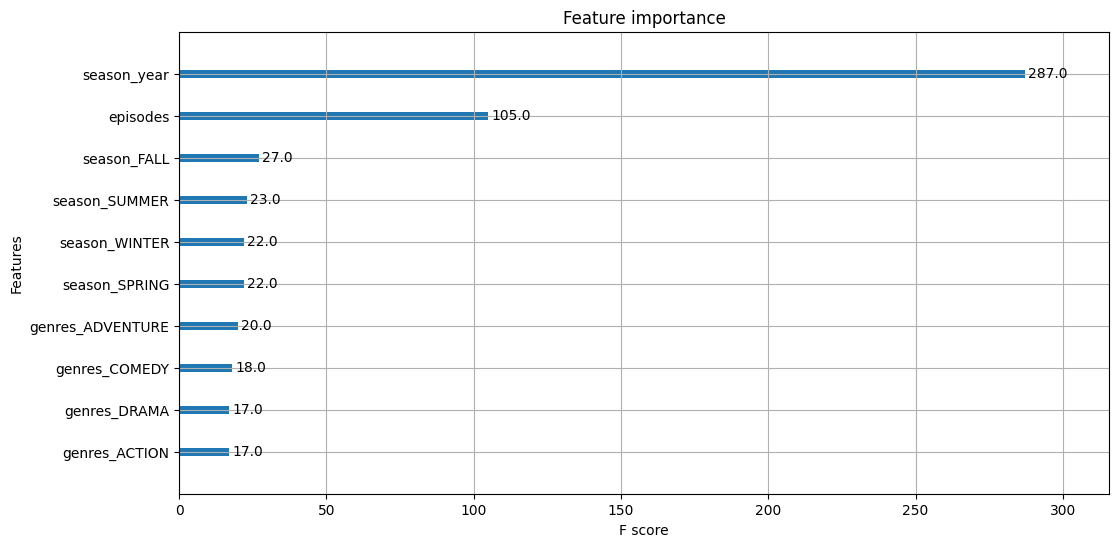

In [880]:
X = user_df[user_df.columns.drop(['score'])]
y = user_df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=SEED, shuffle=True)

model = xgb.XGBRegressor(eval_metric='rmsle')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Actual:', y_test.head(10).tolist())
print('Predictions:', y_pred.tolist()[0:10])
print_model_error(y_test, y_pred)

fig, ax = plt.subplots(figsize=(12,6))
xgb.plot_importance(model, max_num_features=10, ax=ax)
plt.show();

In [881]:
param_grid = {
    'max_depth': [4, 5],
    'n_estimators': [500, 600, 700],
    'learning_rate': [0.01, 0.015]
}
search = GridSearchCV(model, param_grid, cv=3).fit(X_train, y_train)

print('Best hyperparameters =', search.best_params_)

KeyboardInterrupt: 

## Random Forest

In [873]:
# TODO: random forest
# TODO: feature importance plot